# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Exploring and Preparing Data


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


***


### Import Libraries and Define Auxiliary Functions


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

## Exploratory Data Analysis


In [6]:
df=pd.read_csv("E://DATA/SpaceX_dataset/dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [7]:
df['Outcome'].value_counts()

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
None ASDS       2
False Ocean     2
False RTLS      1
Name: Outcome, dtype: int64

In [8]:
df['Orbit'].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
GEO       1
SO        1
HEO       1
ES-L1     1
Name: Orbit, dtype: int64

In [9]:
df['LaunchSite'].value_counts()

CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

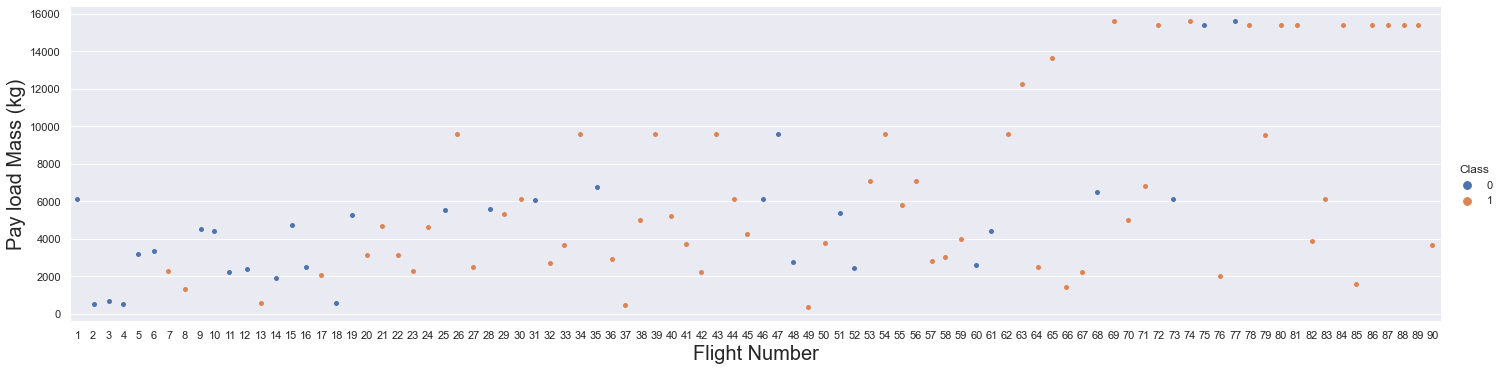

In [10]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 4)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

### Visualize the relationship between Flight Number and Launch Site


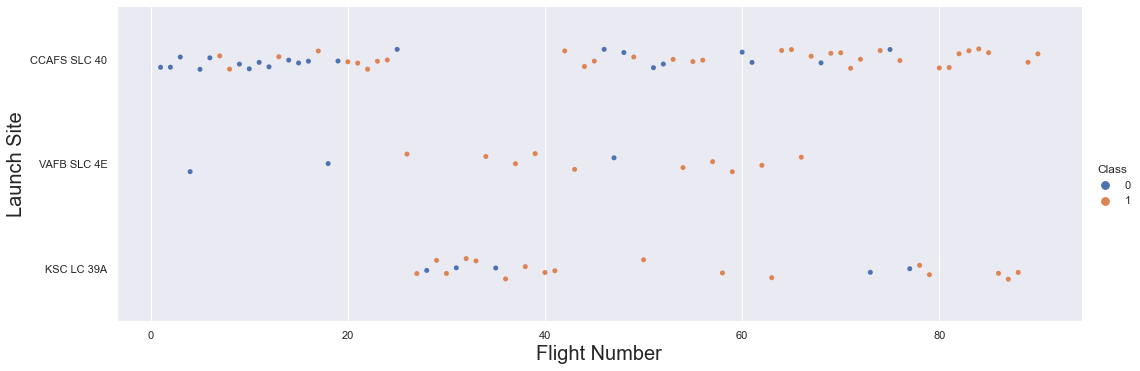

In [11]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(x='FlightNumber', y='LaunchSite', data=df,  hue='Class', aspect = 3)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)
plt.show()

###  Visualize the relationship between Payload and Launch Site


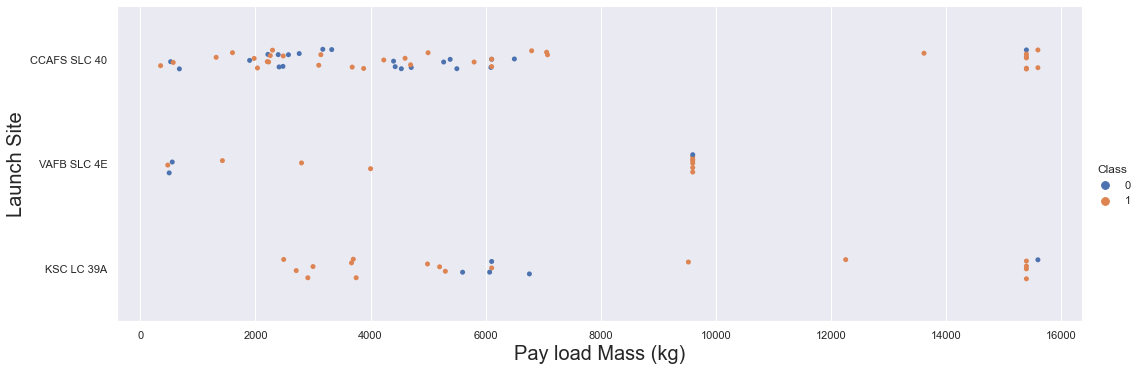

In [12]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df, aspect=3)
plt.xlabel('Pay load Mass (kg)', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)
plt.show()

### Visualize the relationship between success rate of each orbit type


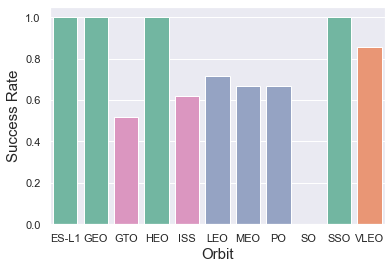

In [13]:
# HINT use groupby method on Orbit column and get the mean of Class column
def colors_from_values(values, palette_name):
    
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)



Success_rate = df[['Class']].groupby(df['Orbit']).mean()
Success_rate.reset_index(inplace=True)
Success_rate.columns =['Orbit', 'Success Rate']
sns.barplot(x='Orbit', y='Success Rate', data=Success_rate, palette=colors_from_values(Success_rate['Success Rate'].values,"Set2_r"))
plt.xlabel('Orbit', fontsize=15)
plt.ylabel('Success Rate', fontsize=15)
plt.show()

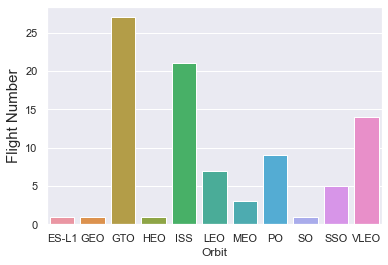

In [14]:
Flight_N = df[['FlightNumber','Class','PayloadMass']].groupby(df['Orbit']).count().reset_index()
#Flight_N
fig = sns.barplot(x='Orbit', y='FlightNumber', data=Flight_N)
plt.ylabel('Flight Number', fontsize=15)
plt.show()

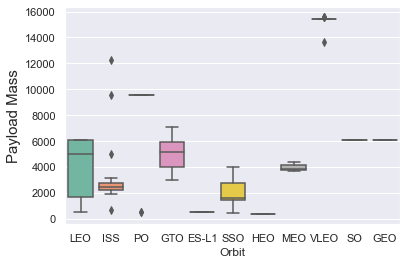

In [15]:
boxplot = sns.boxplot(x= 'Orbit', y= 'PayloadMass', data=df, palette="Set2")
plt.ylabel('Payload Mass', fontsize=15)
plt.show()

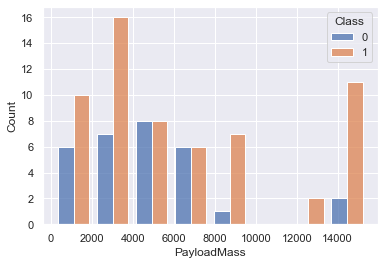

In [16]:
hist = sns.histplot(x='PayloadMass',data=df, hue="Class",bins= 8,multiple="dodge",shrink=.8 )
plt.show()

### Visualize the relationship between FlightNumber and Orbit type


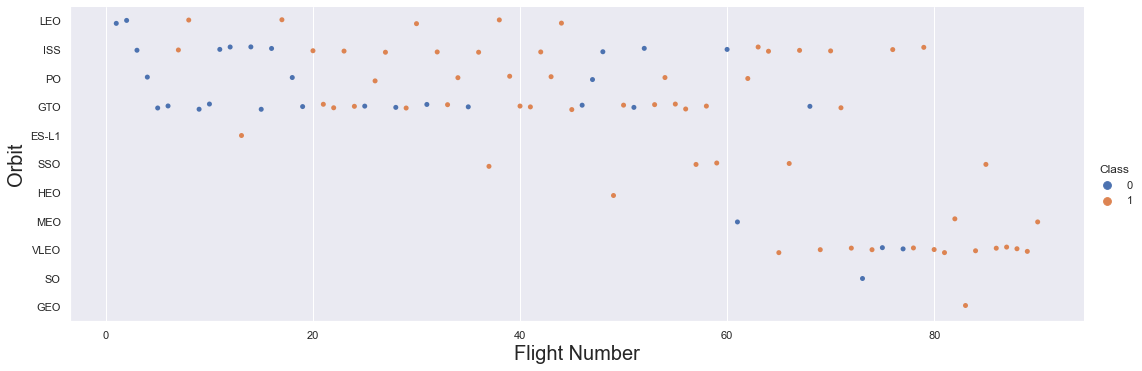

In [17]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(x='FlightNumber', y='Orbit', data=df,  hue='Class', aspect = 3)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Orbit', fontsize=20)
plt.show()

### Visualize the relationship between Payload and Orbit type


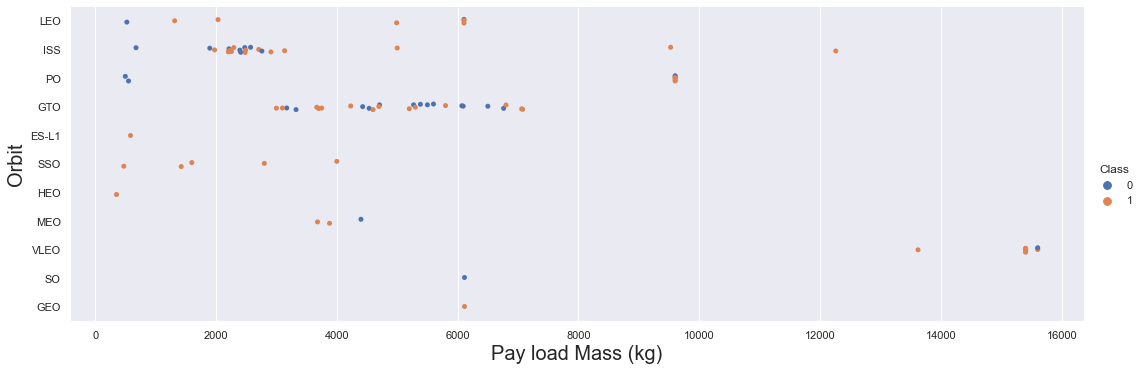

In [18]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(x='PayloadMass', y='Orbit', hue='Class', data=df, aspect=3)
plt.xlabel('Pay load Mass (kg)', fontsize=20)
plt.ylabel('Orbit', fontsize=20)
plt.show()

### Visualize the launch success yearly trend


In [19]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(int(i.split("-")[0]))
    return year
Extract_year(df["Date"])[:5]

[2010, 2012, 2013, 2013, 2013]

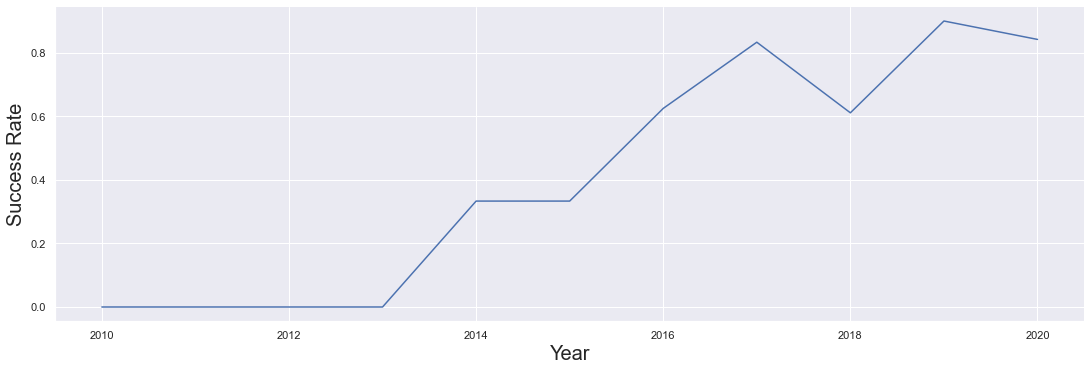

In [20]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
years = {'year':Extract_year(df["Date"])}
df_rate = df[['Class']].join(pd.DataFrame(years))
df_rate = df_rate[['Class']].groupby(df_rate['year']).mean().reset_index()
#Plot
sns.relplot(x='year', y='Class', data=df_rate, kind='line', aspect=3 )
plt.xlabel('Year', fontsize=20)
plt.ylabel('Success Rate', fontsize=20)
plt.show()


## Features Engineering


In [21]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### Create dummy variables to categorical columns


In [22]:
# HINT: Use get_dummies() function on the categorical columns
OH_orbit = pd.get_dummies(features['Orbit'])
OH_LaunchSite = pd.get_dummies(features['LaunchSite'])
OH_LandingPad = pd.get_dummies(features['LandingPad'])
OH_serial = pd.get_dummies(features['Serial'])
features_one_hot = pd.concat([OH_orbit, OH_LaunchSite, OH_LandingPad, OH_serial], axis=1)
pd.set_option('display.max_columns', None)
features_one_hot.head(5)

,ES-L1,GEO,GTO,HEO,ISS,LEO,MEO,PO,SO,SSO,VLEO,CCAFS SLC 40,KSC LC 39A,VAFB SLC 4E,5e9e3032383ecb267a34e7c7,5e9e3032383ecb554034e7c9,5e9e3032383ecb6bb234e7ca,5e9e3032383ecb761634e7cb,5e9e3033383ecbb9e534e7cc,B0003,B0005,B0007,B1003,B1004,B1005,B1006,B1007,B1008,B1010,B1011,B1012,B1013,B1015,B1016,B1017,B1018,B1019,B1020,B1021,B1022,B1023,B1025,B1026,B1028,B1029,B1030,B1031,B1032,B1034,B1035,B1036,B1037,B1038,B1039,B1040,B1041,B1042,B1043,B1044,B1045,B1046,B1047,B1048,B1049,B1050,B1051,B1054,B1056,B1058,B1059,B1060,B1062
0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Cast all numeric columns to `float64`


In [23]:
# HINT: use astype function
features_one_hot = features_one_hot.astype('float')
features_one_hot.dtypes

ES-L1    float64
GEO      float64
GTO      float64
HEO      float64
ISS      float64
          ...   
B1056    float64
B1058    float64
B1059    float64
B1060    float64
B1062    float64
Length: 72, dtype: object

__Version author : Sina Baghdadi__

Copyright © 2020 IBM Corporation. All rights reserved.